In [1]:
# imports
import pandas as pd
from keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import numpy as np
import matplotlib.pyplot as plt
from alibi.explainers import ALE, plot_ale
from alibi.explainers import IntegratedGradients
from sklearn.preprocessing import StandardScaler

2022-11-25 22:41:12.046023: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# load datasets
df = pd.read_csv('/Users/taylor/Desktop/DS340W/term_project/data/wisconsin/wisconsin_train_balanced.csv')
dataset = df.values

# split into input (X) and (test_X)
X = dataset[:,0:30].astype(float)

In [3]:
# Reconstruct models
baseNet = models.load_model('/Users/taylor/Desktop/DS340W/term_project/models/baseNet')
smallNet = models.load_model('/Users/taylor/Desktop/DS340W/term_project/models/smallNet')
bigNet5 = models.load_model('/Users/taylor/Desktop/DS340W/term_project/models/bigNet5')
bigNet7 = models.load_model('/Users/taylor/Desktop/DS340W/term_project/models/bigNet7')
bigNet10 = models.load_model('/Users/taylor/Desktop/DS340W/term_project/models/bigNet10')
bigNet15 = models.load_model('/Users/taylor/Desktop/DS340W/term_project/models/bigNet15')

2022-11-25 22:41:22.428653: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# define ALE params
base_prob_func = baseNet.predict
small_prob_func = smallNet.predict
big5_prob_func = bigNet5.predict
big7_prob_func = bigNet7.predict
big10_prob_func = bigNet10.predict
big15_prob_func = bigNet15.predict

features = ['radius_mean',
                  'texture_mean',
                  'perimeter_mean',
                  'area_mean',
                  'smoothness_mean',
                  'compactness_mean',
                  'concavity_mean',
                  'concave.points_mean',
                  'symmetry_mean',
                  'fractal_dimension_mean',
                  'radius_se',
                  'texture_se',
                  'perimeter_se',
                  'area_se',
                 'smoothness_se',
                 'compactness_se',
                 'concavity_se',
                 'concave.points_se',
                 'symmetry_se',
                 'fractal_dimension_se',
                 'radius_worst',
                 'texture_worst',
                 'perimeter_worst',
                 'area_worst',
                 'smoothness_worst',
                 'compactness_worst',
                 'concavity_worst',
                 'concave.points_worst',
                 'symmetry_worst',
                 'fractal_dimension_worst']

target = ['diagnosis']

In [5]:
# create ALE objects
base_ale = ALE(base_prob_func, feature_names=features, target_names=target)
small_ale = ALE(small_prob_func, feature_names=features, target_names=target)
big5_ale = ALE(big5_prob_func, feature_names=features, target_names=target)
big7_ale = ALE(big7_prob_func, feature_names=features, target_names=target)
big10_ale = ALE(big10_prob_func, feature_names=features, target_names=target)
big15_ale = ALE(big15_prob_func, feature_names=features, target_names=target)


In [6]:
# create explainers
baseExplainer = base_ale.explain(X)
smallExplainer = small_ale.explain(X)
big5Explainer = big5_ale.explain(X)
big7Explainer = big7_ale.explain(X)
big10Explainer = big10_ale.explain(X)
big15Explainer = big15_ale.explain(X)

46/46 [==============================] - 0s 1ms/step


46/46 [==============================] - 0s 2ms/step


46/46 [==============================] - 0s 2ms/step


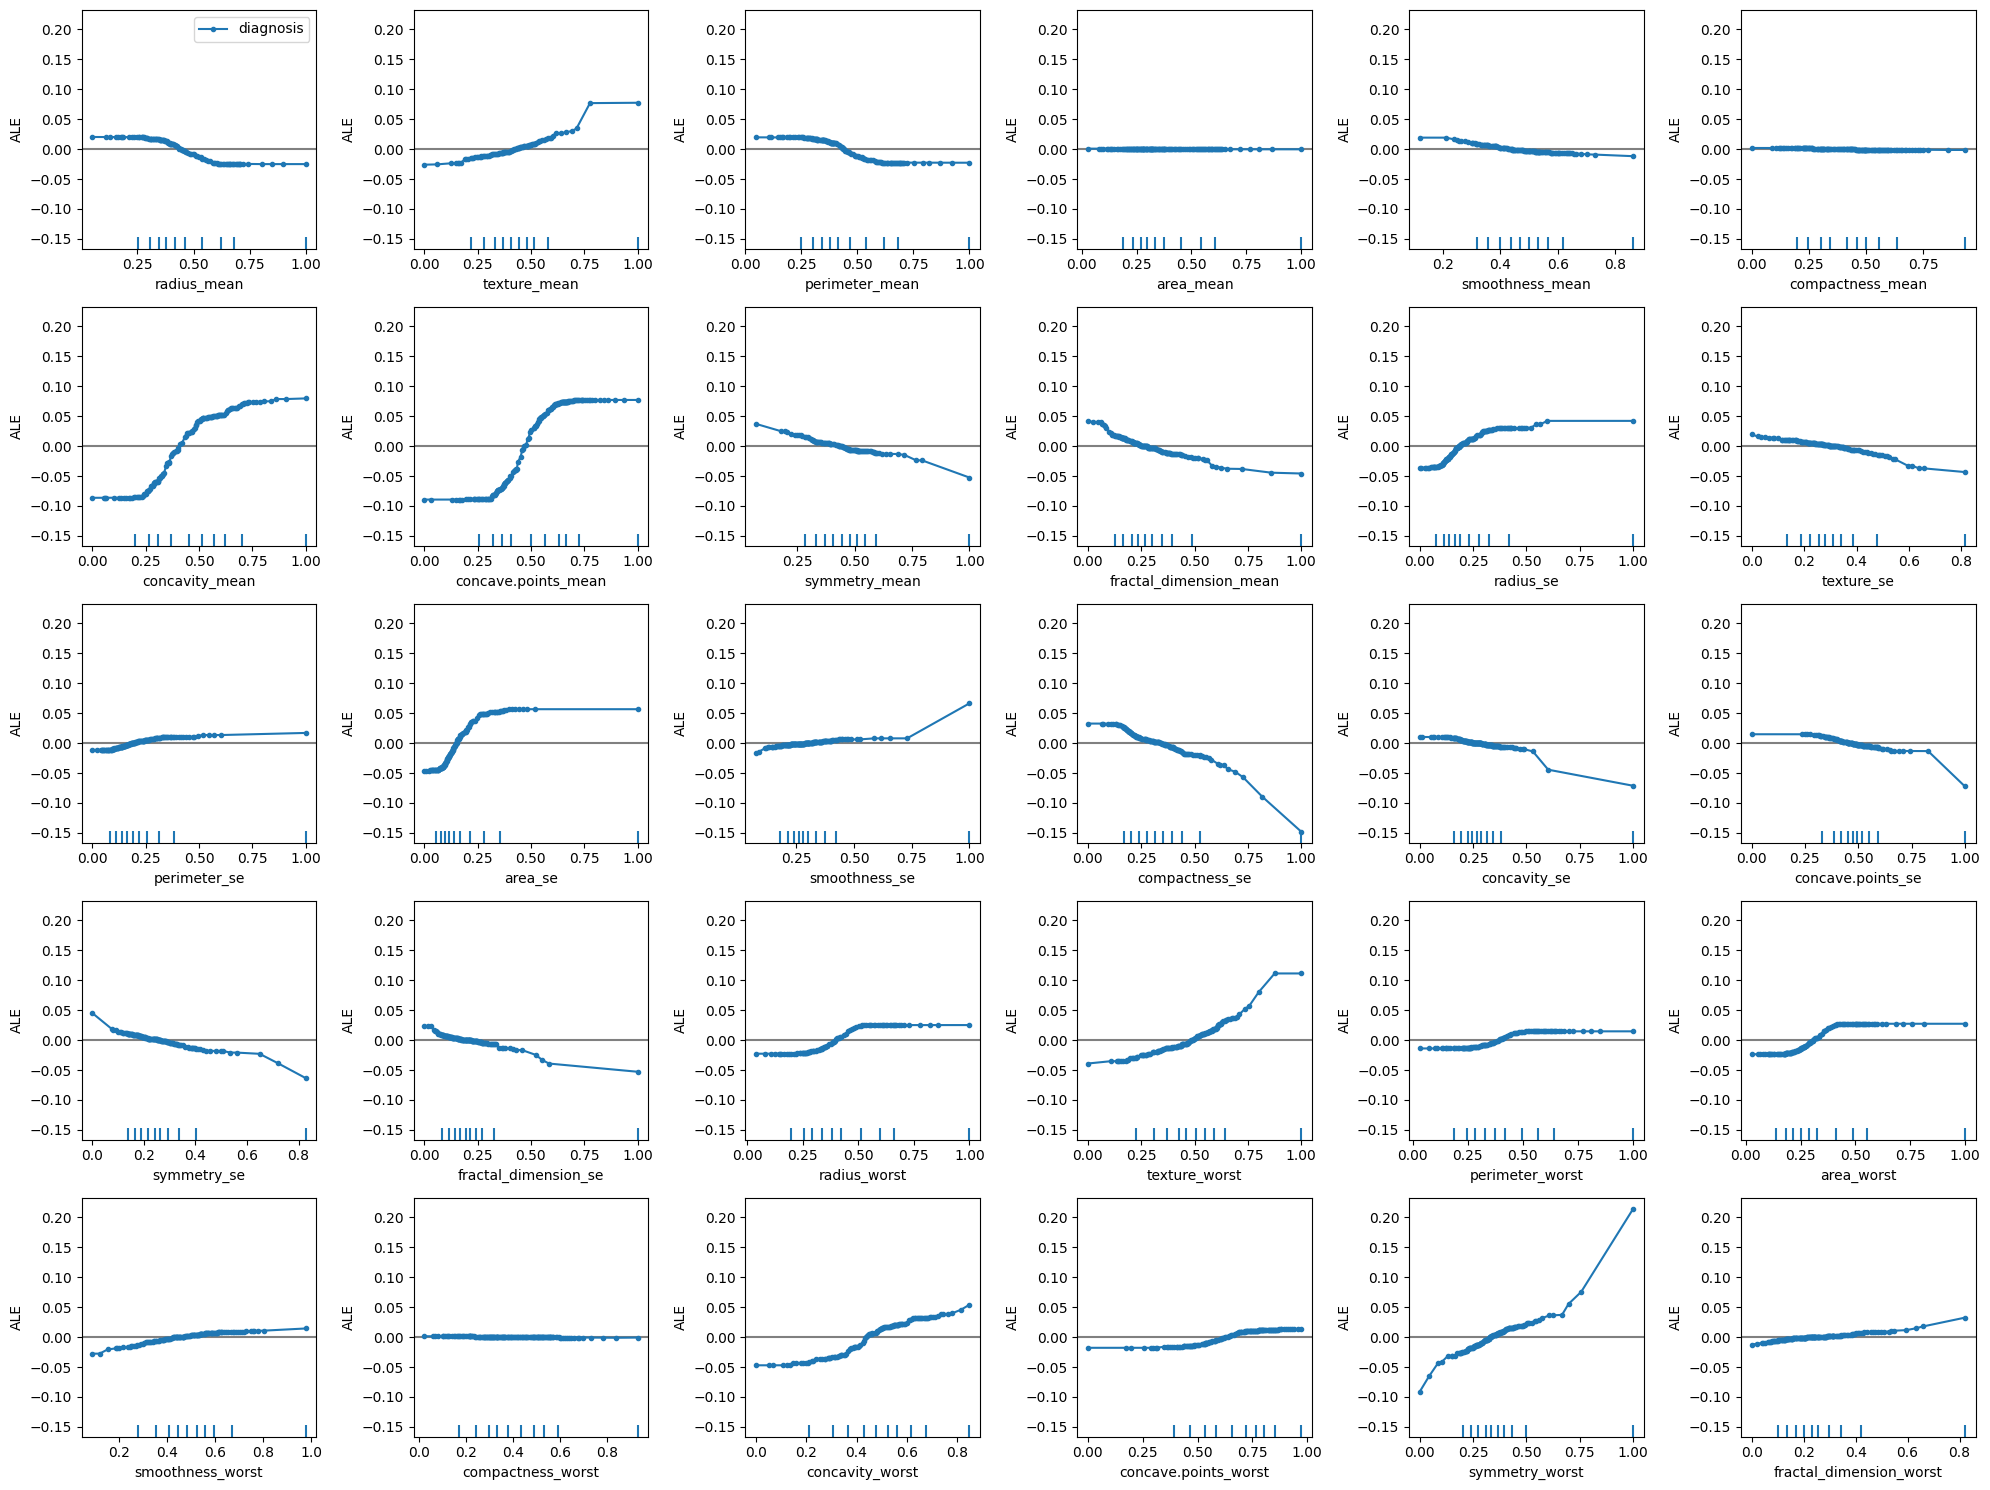

In [7]:
# plot base model ALE
plot_ale(baseExplainer, n_cols=6, fig_kw={'figwidth': 20, 'figheight': 15});

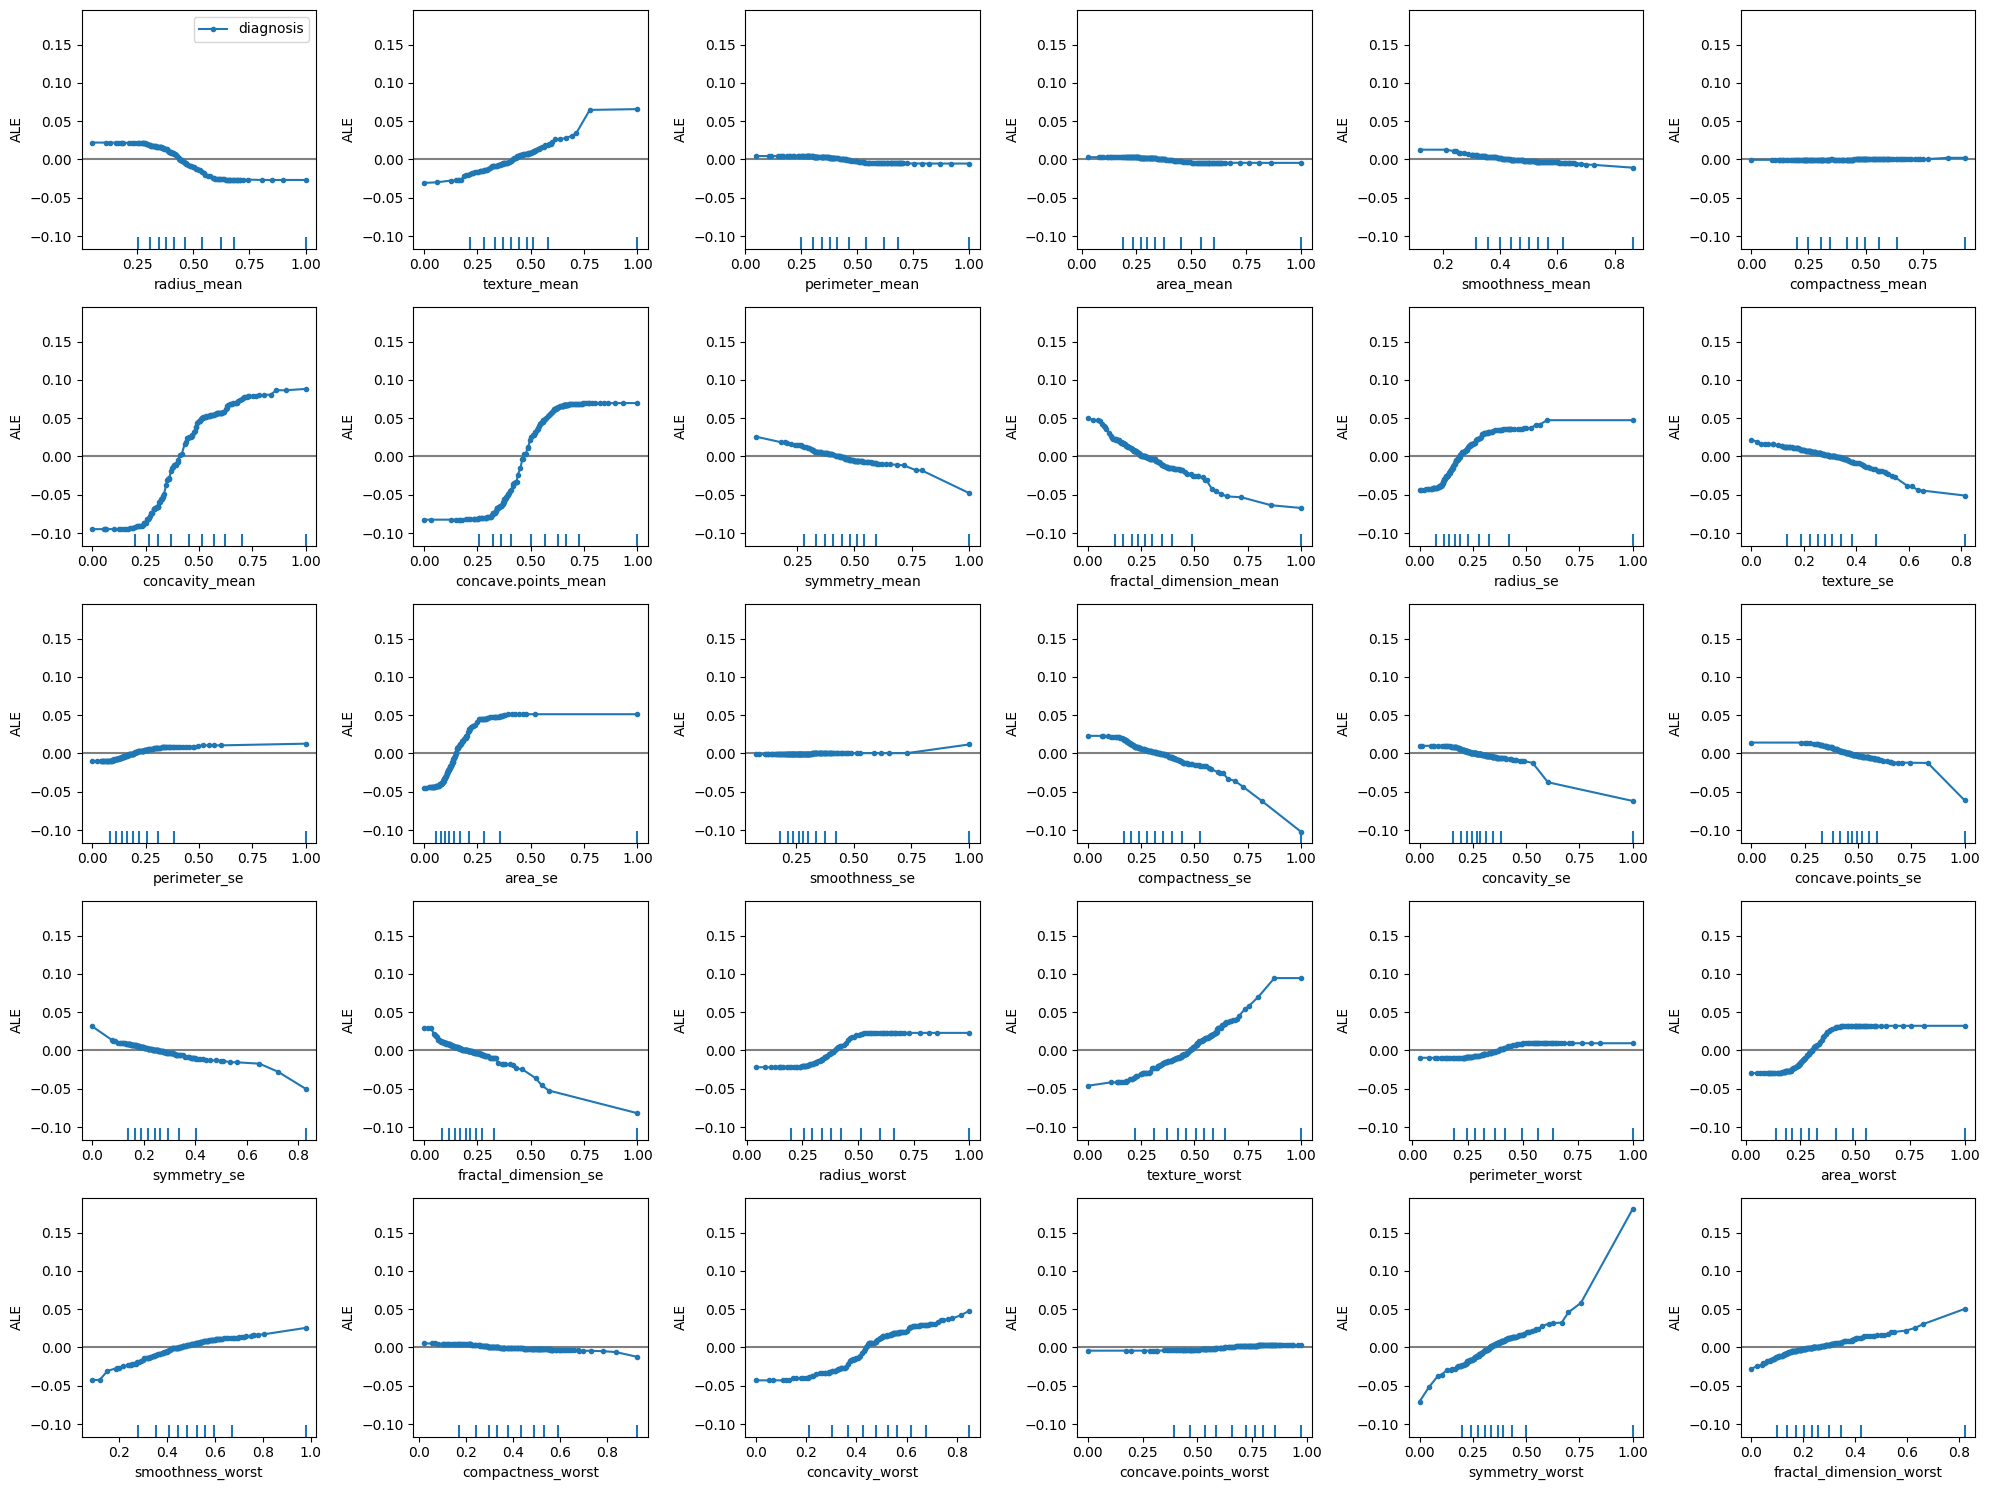

In [8]:
# plot small model ALE
plot_ale(smallExplainer, n_cols=6, fig_kw={'figwidth': 20, 'figheight': 15});

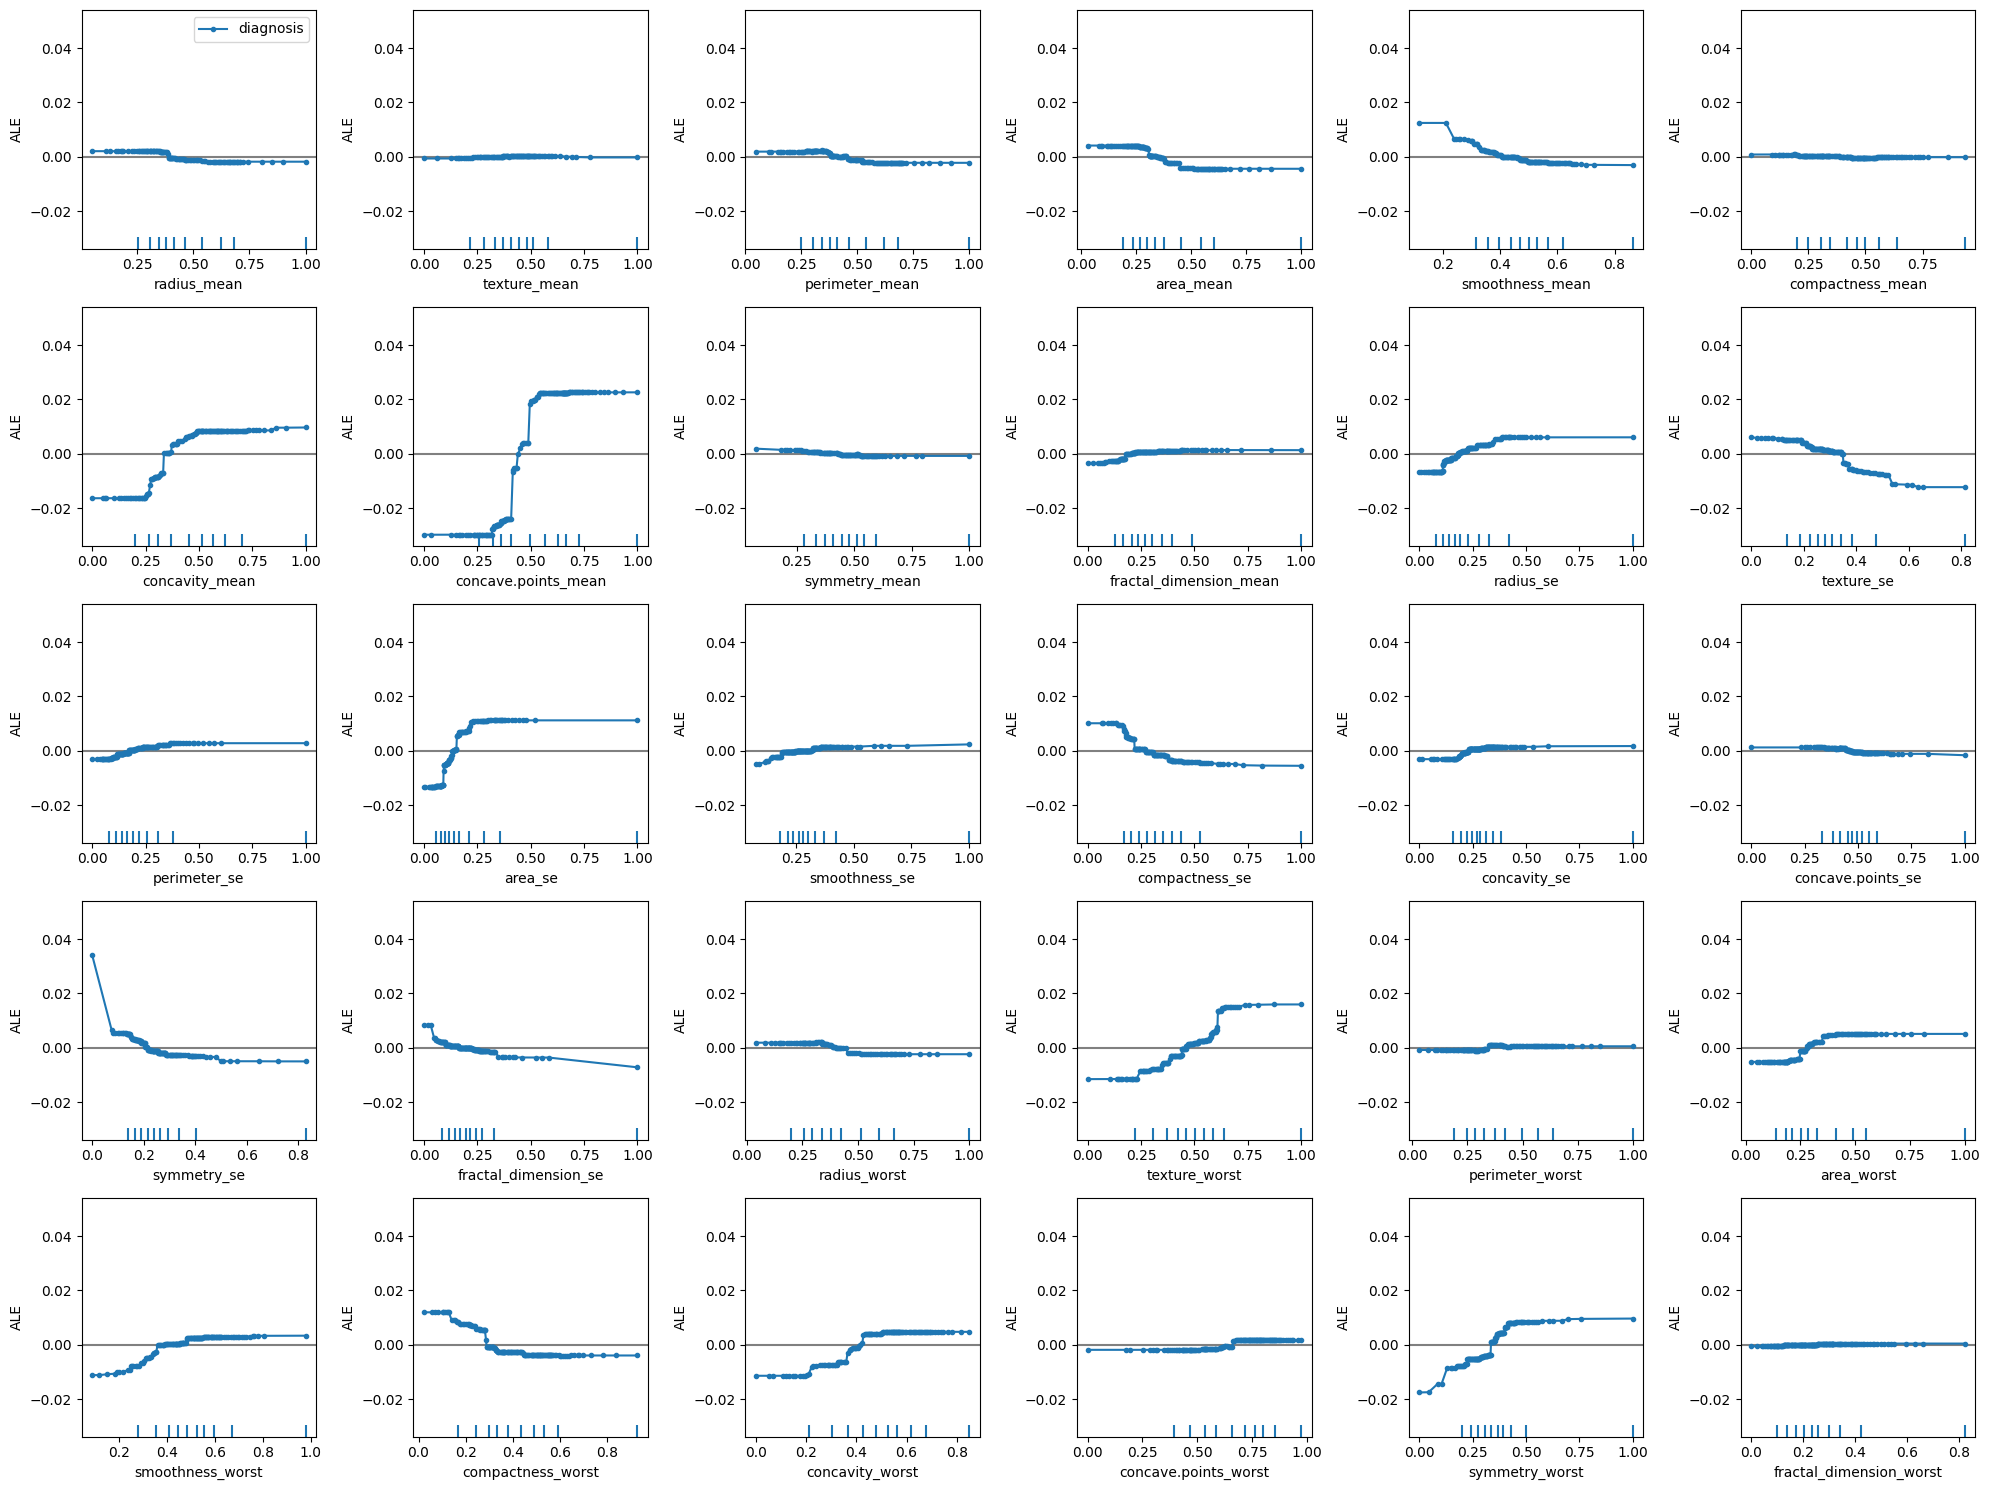

In [9]:
# plot bigNet5 model ALE
plot_ale(big5Explainer, n_cols=6, fig_kw={'figwidth': 20, 'figheight': 15});

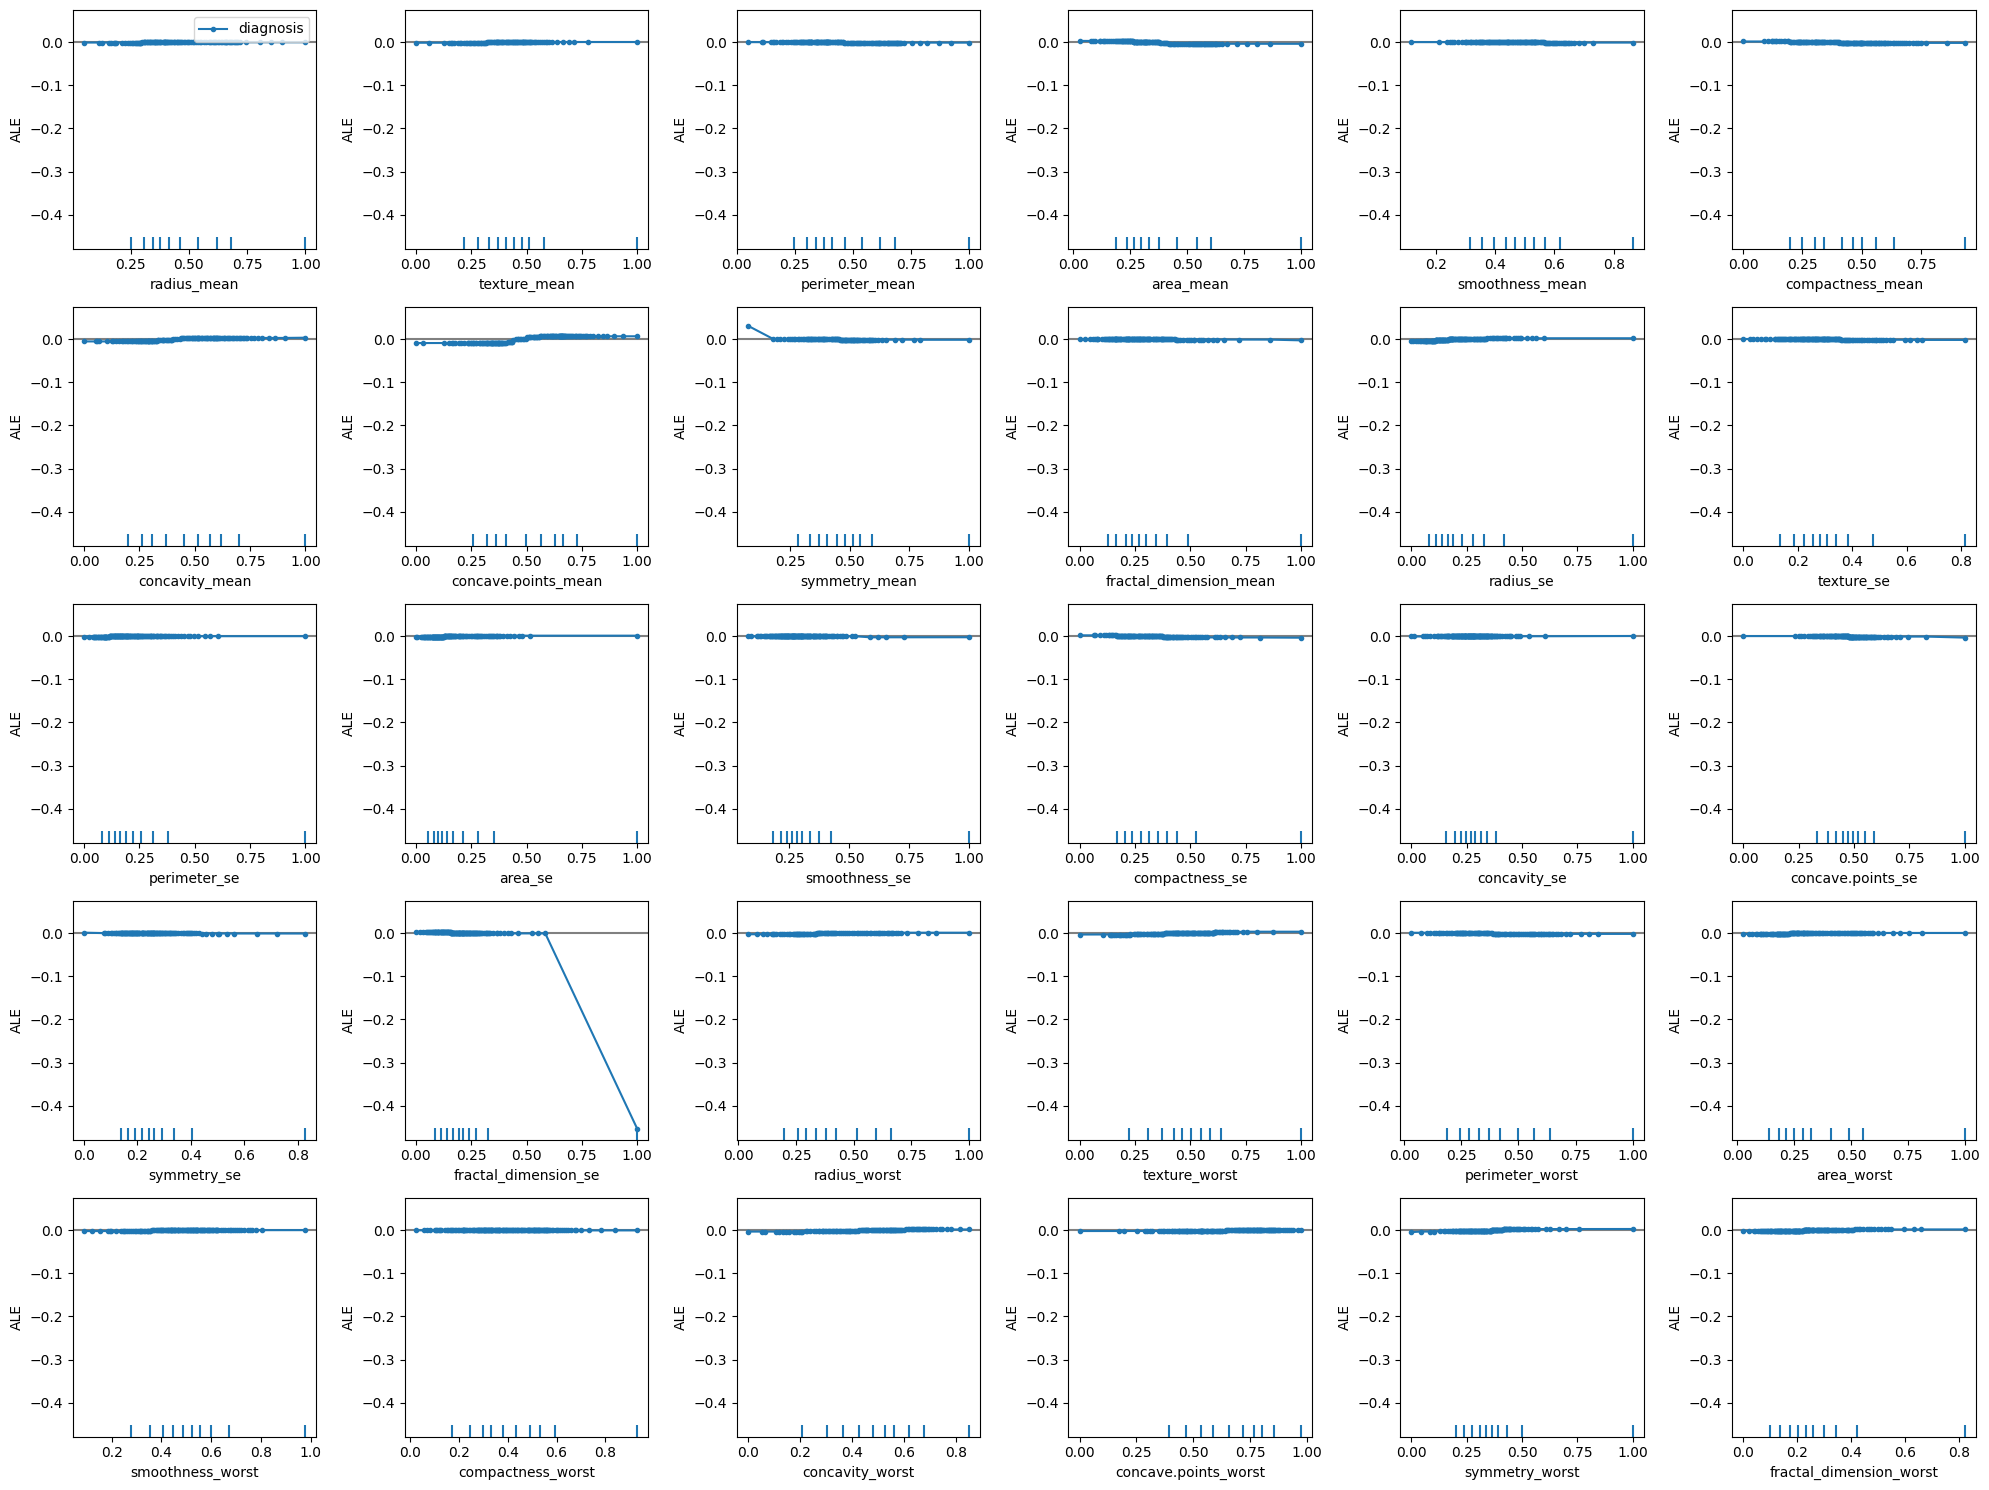

In [10]:
# plot bigNet7 model ALE
plot_ale(big7Explainer, n_cols=6, fig_kw={'figwidth': 20, 'figheight': 15});

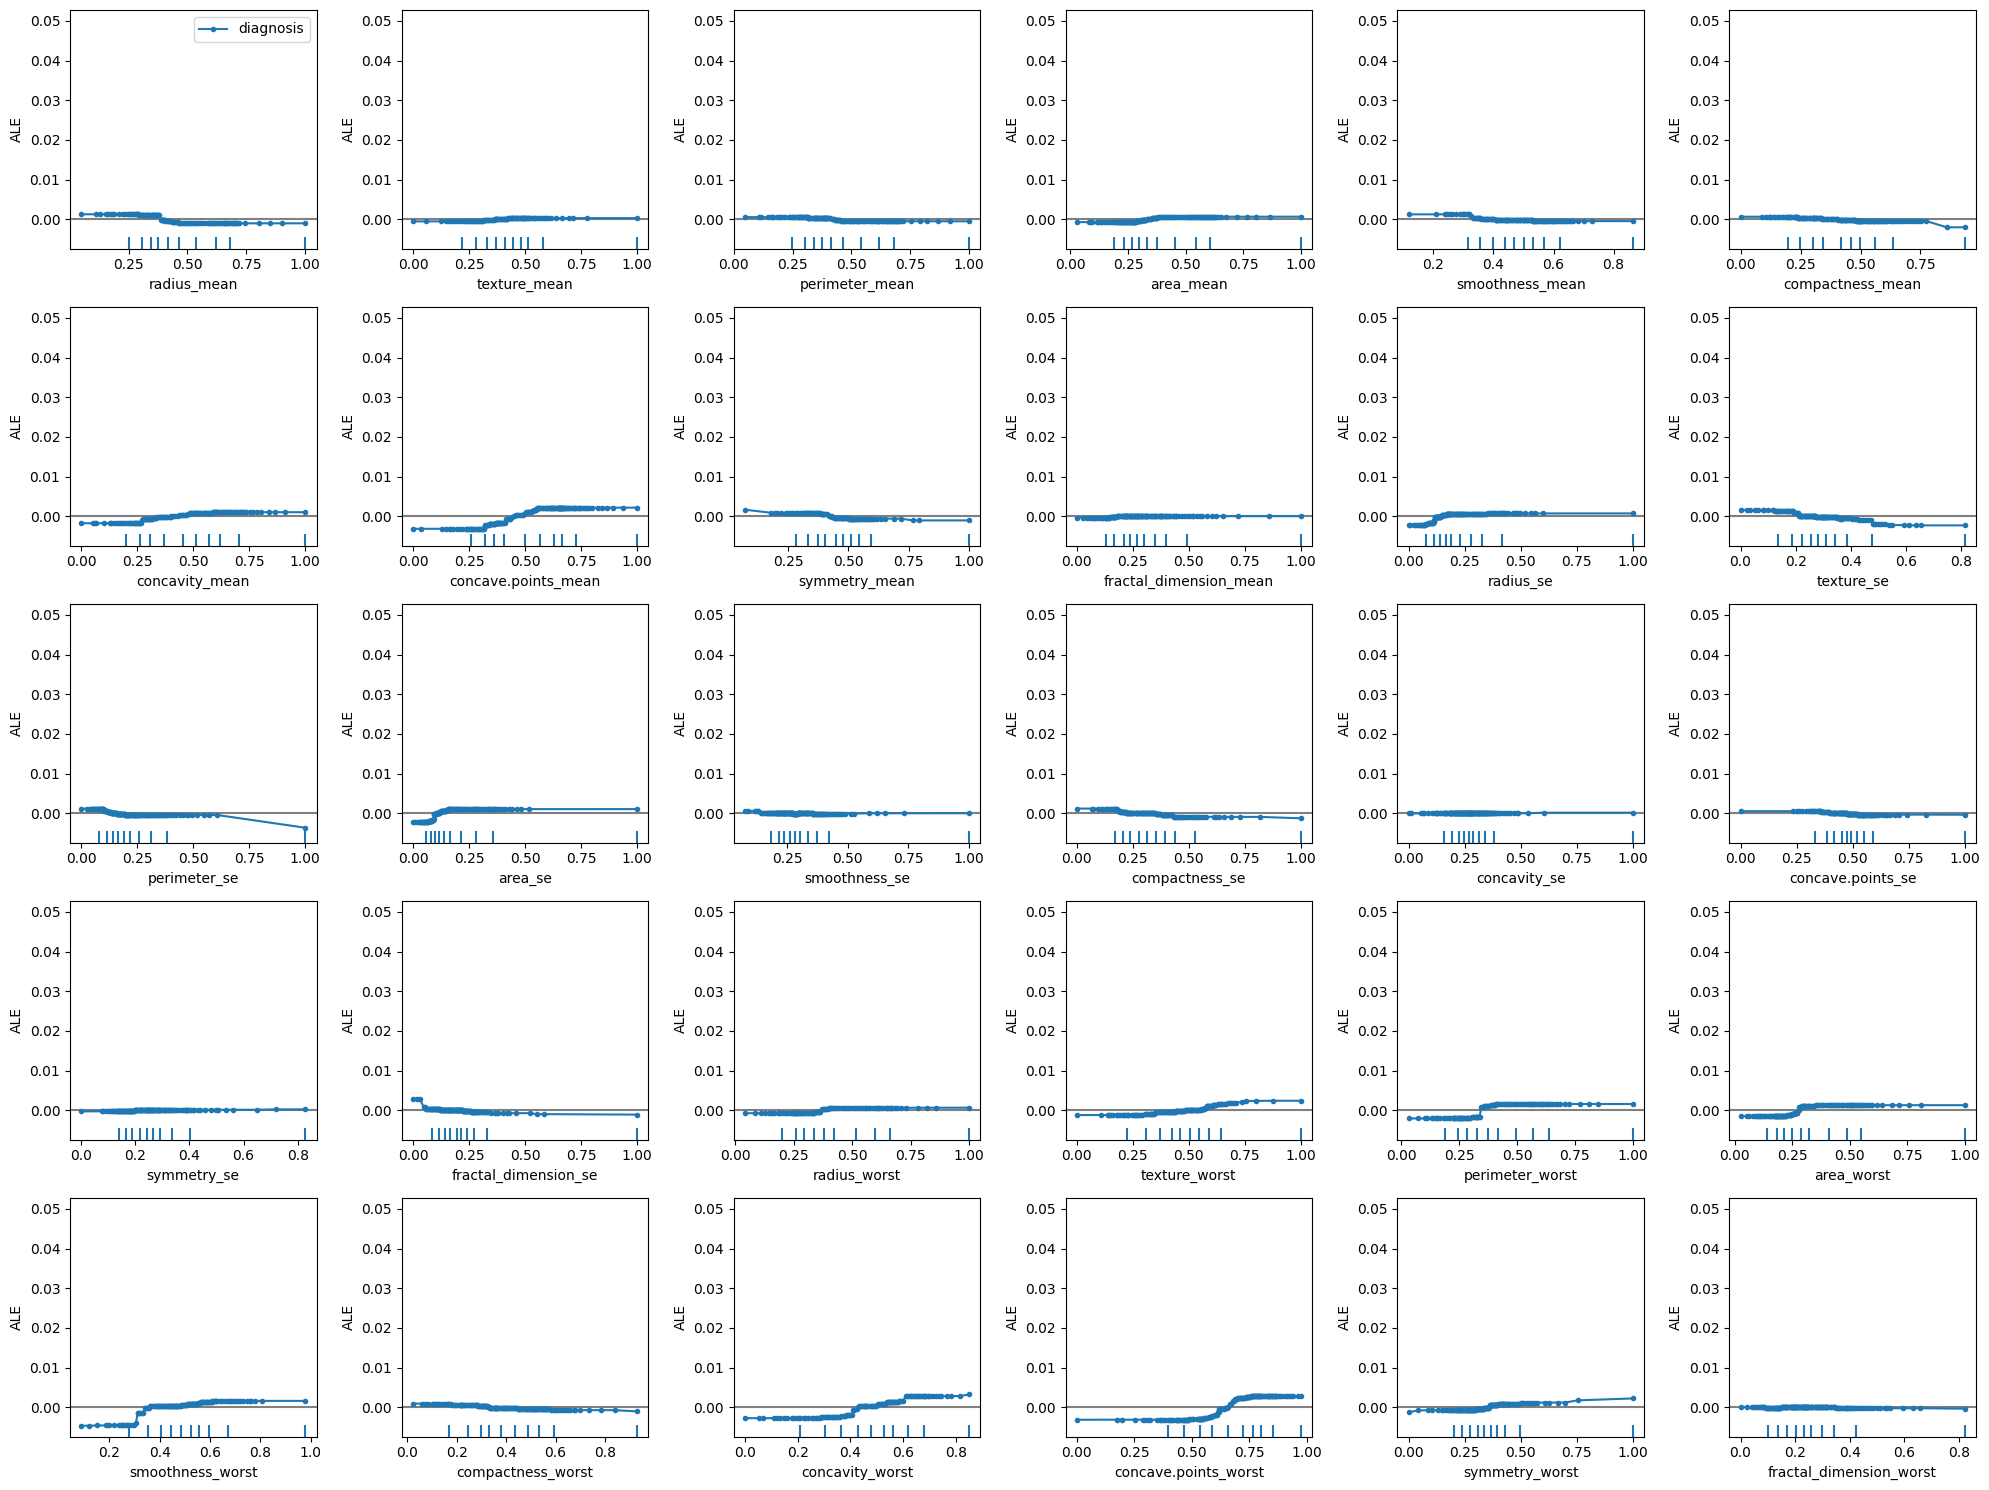

In [11]:
# plot bigNet10 model ALE
plot_ale(big10Explainer, n_cols=6, fig_kw={'figwidth': 20, 'figheight': 15});

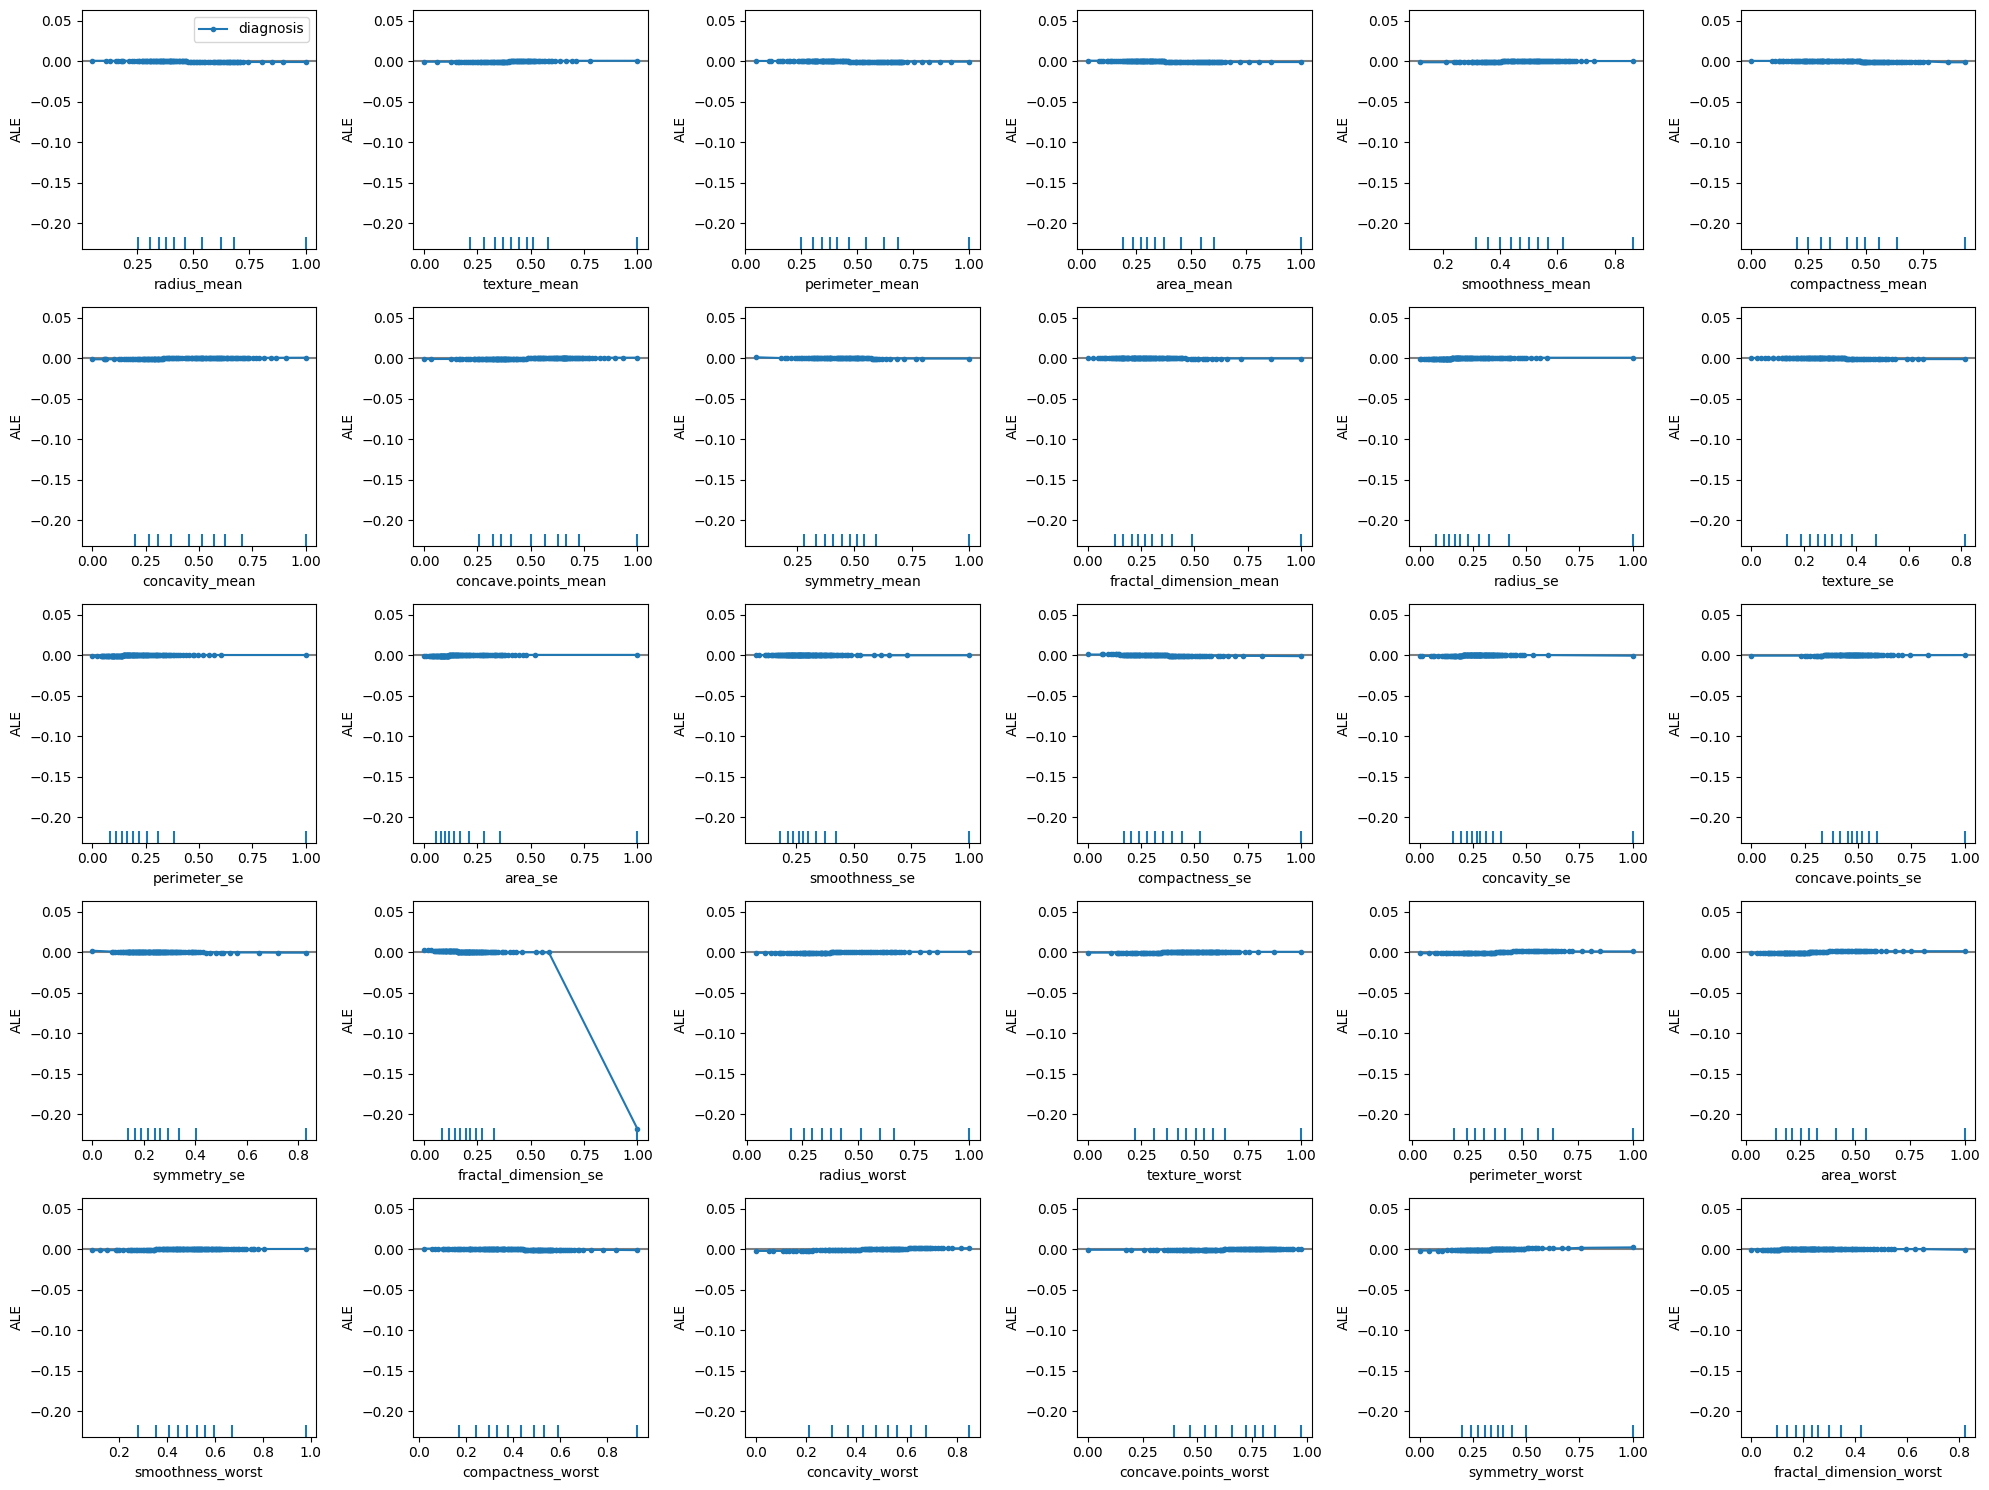

In [12]:
# plot bigNet15 model ALE
plot_ale(big15Explainer, n_cols=6, fig_kw={'figwidth': 20, 'figheight': 15});

In [13]:
# integrated gradients feature importance

In [14]:
def plot_importance(feat_imp, feat_names, class_idx, **kwargs):
    """
    Create a horizontal barchart of feature effects, sorted by their magnitude.
    """

    df = pd.DataFrame(data=feat_imp, columns=feat_names).sort_values(by=0, axis='columns')
    feat_imp, feat_names = df.values[0], df.columns
    fig, ax = plt.subplots(figsize=(10, 5))
    y_pos = np.arange(len(feat_imp))
    ax.barh(y_pos, feat_imp)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(feat_names, fontsize=7)
    ax.invert_yaxis()
    ax.set_xlabel(f'Feature effects for class {class_idx}', fontsize=15)
    return ax, fig

# create prediction instance
x = np.array([[.372,
               .1327,
               .2988,
               .2742,
               .4041,
               .2756,
               0.2443,
               0.3738,
               0.3982,
               0.1856,
               0.0104,
               0.0595,
               0.0041,
               0.01913,
               0.1497,
               0.1762,
               0.1521,
               0.3197,
               0.1204,
               0.0632,
               0.2948,
               0.2399,
               0.2608,
               0.1774,
               0.5126,
               0.3191,
               0.4081,
               0.7192,
               0.3966,
               0.1647]])

In [15]:
scaler = StandardScaler()
scaler.fit(X)

baseIG = IntegratedGradients(baseNet,
                         layer=None,
                         method="gausslegendre",
                         n_steps=50,
                         internal_batch_size=100)

smallIG = IntegratedGradients(smallNet,
                         layer=None,
                         method="gausslegendre",
                         n_steps=50,
                         internal_batch_size=100)

big5IG = IntegratedGradients(bigNet5,
                         layer=None,
                         method="gausslegendre",
                         n_steps=50,
                         internal_batch_size=100)

big7IG = IntegratedGradients(bigNet7,
                         layer=None,
                         method="gausslegendre",
                         n_steps=50,
                         internal_batch_size=100)

big10IG = IntegratedGradients(bigNet10,
                         layer=None,
                         method="gausslegendre",
                         n_steps=50,
                         internal_batch_size=100)

big15IG = IntegratedGradients(bigNet15,
                         layer=None,
                         method="gausslegendre",
                         n_steps=50,
                         internal_batch_size=100)

baseRes = baseIG.explain(scaler.transform(x), target=0)
smallRes = smallIG.explain(scaler.transform(x), target=0)
big5Res = big5IG.explain(scaler.transform(x), target=0)
big7Res = big7IG.explain(scaler.transform(x), target=0)
big10Res = big10IG.explain(scaler.transform(x), target=0)
big15Res = big15IG.explain(scaler.transform(x), target=0)

(<AxesSubplot: xlabel='Feature effects for class "having cancer present"'>,
 <Figure size 1000x500 with 1 Axes>)

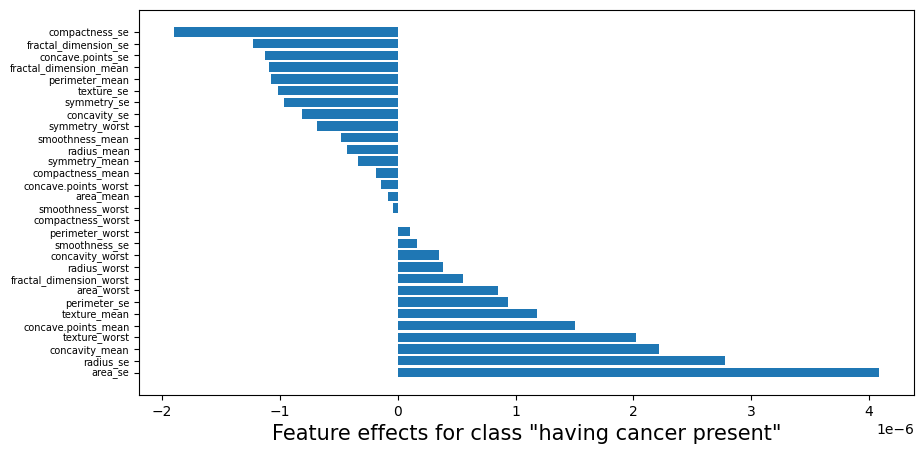

In [16]:
plot_importance(baseRes.data['attributions'][0], features, '"having cancer present"')

(<AxesSubplot: xlabel='Feature effects for class "having cancer present"'>,
 <Figure size 1000x500 with 1 Axes>)

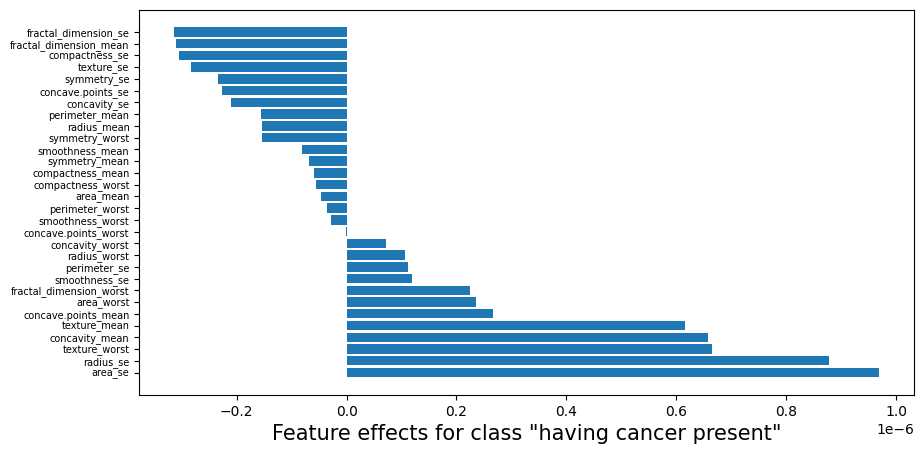

In [17]:
plot_importance(smallRes.data['attributions'][0], features, '"having cancer present"')

(<AxesSubplot: xlabel='Feature effects for class "having cancer present"'>,
 <Figure size 1000x500 with 1 Axes>)

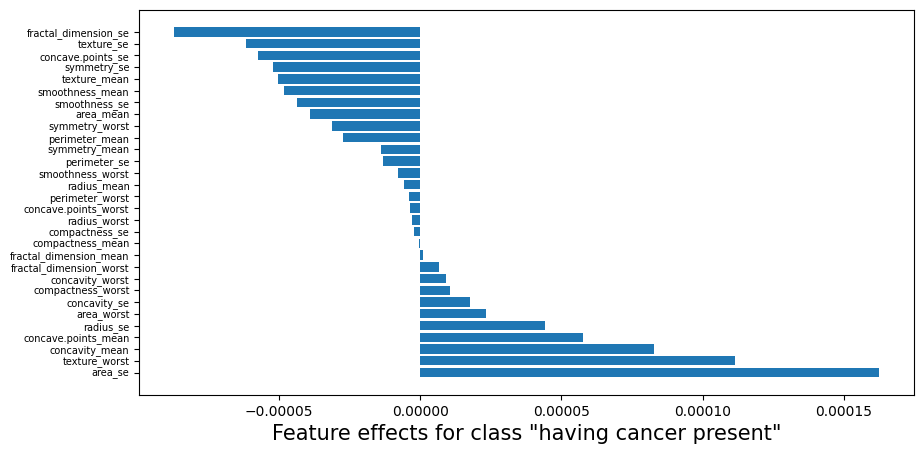

In [18]:
plot_importance(big5Res.data['attributions'][0], features, '"having cancer present"')

(<AxesSubplot: xlabel='Feature effects for class "having cancer present"'>,
 <Figure size 1000x500 with 1 Axes>)

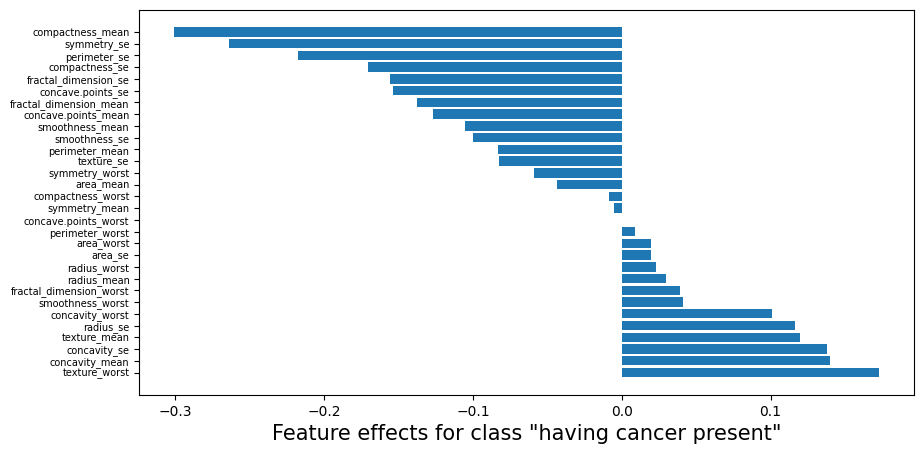

In [19]:
plot_importance(big7Res.data['attributions'][0], features, '"having cancer present"')

(<AxesSubplot: xlabel='Feature effects for class "having cancer present"'>,
 <Figure size 1000x500 with 1 Axes>)

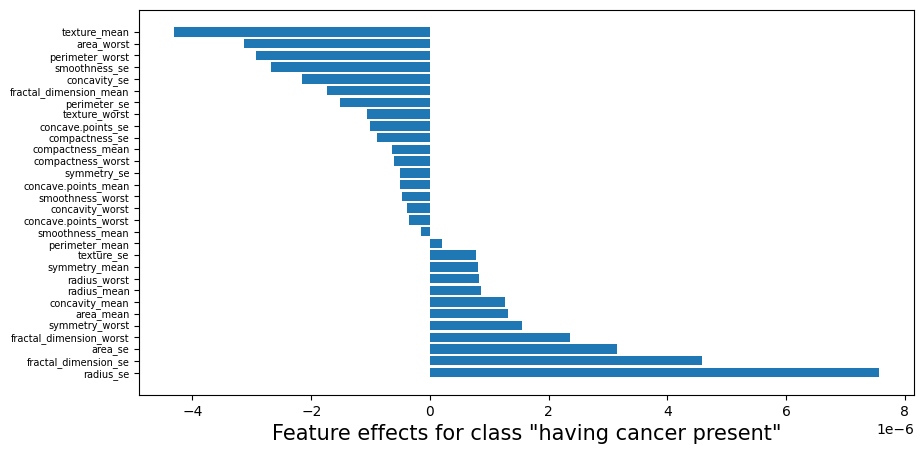

In [20]:
plot_importance(big10Res.data['attributions'][0], features, '"having cancer present"')

(<AxesSubplot: xlabel='Feature effects for class "having cancer present"'>,
 <Figure size 1000x500 with 1 Axes>)

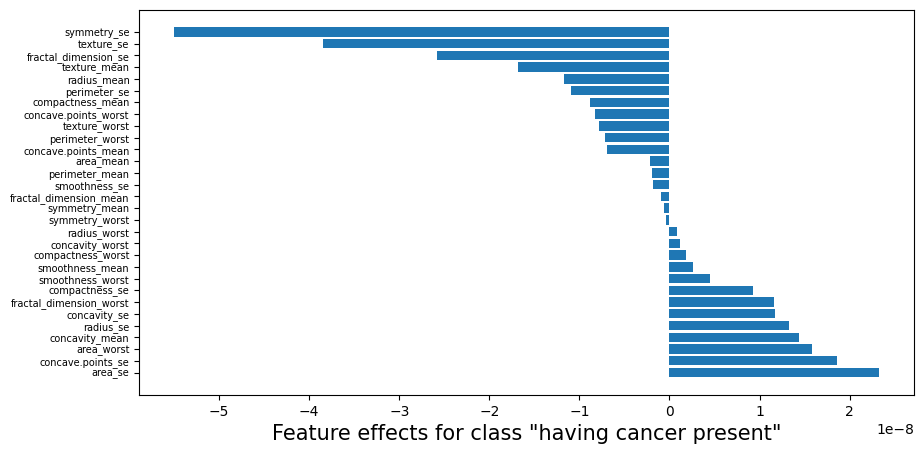

In [21]:
plot_importance(big15Res.data['attributions'][0], features, '"having cancer present"')